# Confidence Intervals and Hypothesis Testing
My workthrough of a code from Dr. Pyrcz, the goal is to take two data sets from two different wells, look at the porosity values from two wells and see how statistically related they are

First import the different libraries and standard packages

In [1]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats        #libraries to help with visualizations and geostatistcs from DR. Prycz

import numpy as np 
import os
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt                      #our standard packages from numerical methods and visualizations and formatting

Set the directory, I am using a file on my desktop with all my python practice inlcuded

In [2]:
os.chdir("/Users/AlexDodd/Desktop/Python Practice/CI and Hypothesis Testing")

Next we need to load in a data frame or data set to work with, 

In [3]:
df = pd.read_excel('PorositySample2Units.xlsx')
df.head(13)

,X1,X2
0,0.21,0.20
1,0.17,0.26
2,0.15,0.20
3,0.20,0.19
4,0.19,0.13
5,0.18,0.22
6,0.16,0.30
7,0.11,0.16
8,0.13,0.23
9,0.15,0.17


Looking at some of the summary statistcs

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,20.0,0.1645,0.027810,0.11,0.1500,0.17,0.19,0.21
X2,20.0,0.2000,0.045422,0.11,0.1675,0.20,0.23,0.30


Next lets make the x1 and x2 columns into usable variables

In [5]:
Por1 = df['X1'].values           #puts the porosity into usuable ndarrays
Por2 = df['X2'].values

In [6]:
print(Por1)

[0.21 0.17 0.15 0.2  0.19 0.18 0.16 0.11 0.13 0.15 0.17 0.17 0.19 0.15
 0.17 0.11 0.14 0.19 0.19 0.16]


Looking at the distribution of the data sets

In [7]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

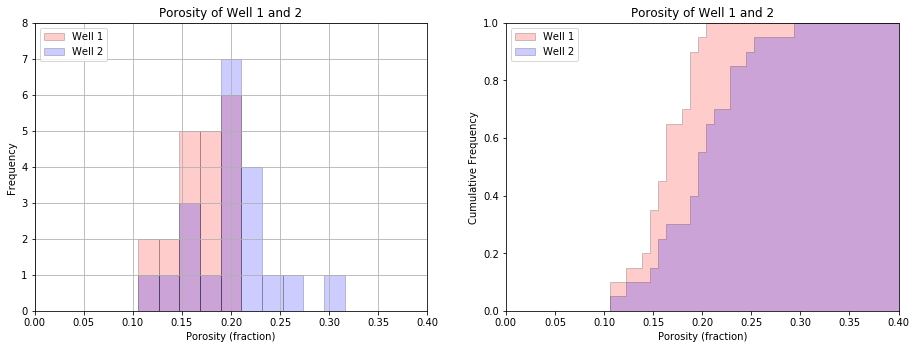

In [8]:
plt.subplot(121)
plt.hist(Por1,facecolor='red',bins = np.linspace(0,0.4,20),alpha=0.2,density=False,edgecolor='black',label = 'Well 1')
plt.hist(Por2,facecolor='blue',bins=np.linspace(0,0.4,20),alpha=0.2,density=False,edgecolor='black',label='Well 2')
plt.xlim([0,0.4]);
plt.ylim([0,8]);
plt.xlabel('Porosity (fraction)');plt.ylabel('Frequency');plt.title('Porosity of Well 1 and 2')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)
plt.hist(Por1,facecolor='red',bins=np.linspace(0,0.4,50),alpha=0.2,histtype='stepfilled',density=True,cumulative=True,edgecolor='black',label='Well 1')
plt.hist(Por2,facecolor='blue',bins=np.linspace(0,0.4,50),alpha=0.2,histtype='stepfilled',density=True,cumulative=True,edgecolor='black',label='Well 2')
plt.xlim([0,0.4])
plt.ylim([0,1.0]);
plt.xlabel('Porosity (fraction)');plt.ylabel('Cumulative Frequency');plt.title('Porosity of Well 1 and 2')
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.0,wspace=.2,hspace=0.3)

What to look for, number of samples for a reliable source should be greater than 20, and the cdf and historgram should allign well visually. This sample set does not look correlated, but we will find out the confidence interval and test our hypothesis on the correlation of these wells.

# Confidence Interval
Next we will use a 95% confidence interval of the sample mean to decide if these wells are within the range of being correlated. Using a student t distrubtion function from Geostats.py, we will look at the sample mean distribution.

In [9]:
stats.t.interval

<bound method rv_generic.interval of <scipy.stats._continuous_distns.t_gen object at 0x1a1ce152d0>>

In [10]:
ci_95_Por1 = stats.t.interval(0.95,len(df)-1,loc=np.mean(Por1),scale=stats.sem(Por1))
ci_95_Por2 = stats.t.interval(0.95,len(df)-1,loc=np.mean(Por2),scale=stats.sem(Por2))

print('The confidence interval for the well 1 porosity mean is '+ str(round(np.mean(Por1),3))+' +/- '
+str(round(ci_95_Por1[1]-np.mean(Por1),3))+' and the range is '+str(round(ci_95_Por1[0],3))+',' +
str(round(ci_95_Por1[1],3)))

print('The confidence interval for the well 2 porosity mean is '+ str(round(np.mean(Por2),3))+' +/- '
+str(round(ci_95_Por2[1]-np.mean(Por2),3))+' and the range is '+str(round(ci_95_Por2[0],3))+',' +
str(round(ci_95_Por2[1],3)))

The confidence interval for the well 1 porosity mean is 0.164 +/- 0.013 and the range is 0.151,0.178
The confidence interval for the well 2 porosity mean is 0.2 +/- 0.021 and the range is 0.179,0.221


Now we need to take these confidence interval s and build and uncertainty model to compare our two wells. We will use the GSLIB.affine function to find the P5 and P95 values for our wells.

In [11]:
GSLIB.affine

<function geostatspy.GSLIB.affine(array, tmean, tstdev)>

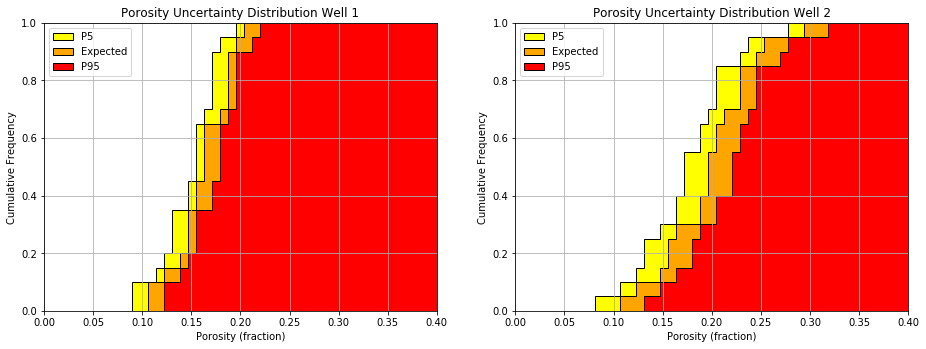

In [12]:
stdev1=np.std(Por1); stdev2=np.std(Por2)
Por1r05=GSLIB.affine(Por1,tmean = ci_95_Por1[0],tstdev = stdev1 )
Por1r95=GSLIB.affine(Por1,tmean = ci_95_Por1[1],tstdev = stdev1 )
Por2r05=GSLIB.affine(Por2,tmean = ci_95_Por2[0],tstdev = stdev2 )
Por2r95=GSLIB.affine(Por2,tmean = ci_95_Por2[1],tstdev = stdev2 )

plt.subplot(121)
plt.hist(Por1r05,facecolor='yellow',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'P5');
plt.hist(Por1,facecolor='orange',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'Expected');
plt.hist(Por1r95,facecolor='red',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'P95');
plt.xlim(0,0.4);plt.ylim(0,1.0);
plt.xlabel('Porosity (fraction)');plt.ylabel('Cumulative Frequency');plt.title('Porosity Uncertainty Distribution Well 1');
plt.grid(True);
plt.legend(loc='upper left');

plt.subplot(122)
plt.hist(Por2r05,facecolor='yellow',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'P5');
plt.hist(Por2,facecolor='orange',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'Expected');
plt.hist(Por2r95,facecolor='red',bins=np.linspace(0,0.4,50),alpha=1.0,histtype='stepfilled',density=True,
cumulative=True, edgecolor='black', label = 'P95');
plt.xlim(0,0.4);plt.ylim(0,1.0);
plt.xlabel('Porosity (fraction)');plt.ylabel('Cumulative Frequency');plt.title('Porosity Uncertainty Distribution Well 2');
plt.grid(True);
plt.legend(loc='upper left');


plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.0,wspace=.2,hspace=0.3)

In [13]:
plt.hist

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

The assumptions using this uncertainty model are that the distribution is Gaussian and the two samples are independent. Next is to set up our hypothesis test:

The hypothesis tets will help answer the question if well 1 and well 2 are drilled into the same rock, or if something changed between the two wells, or if there is an issue with stratal continuity. Using a t-statistc and p value:

In [14]:
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [15]:
t_pooled,p_pooled = stats.ttest_ind(Por1,Por2)
print('The t-statistic is ' + str(round(t_pooled,3))+ ' , and the p-value is ' + str(round(p_pooled,3)))

The t-statistic is -2.981 , and the p-value is 0.005


 The p-value,  𝑝 , is the symmetric interval probaiblity our outside. In other words the  𝑝  reported is 2 x cumulative probaiblity of the t statistic applied to the sampling t distribution. Another way to look at it, if one used the  ±𝑡𝑡𝑠𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐,.𝑑.𝑓  statistic as thresholds,  𝑝  is the probability being outside this symmetric interval. So we will reject the null hypothesis if  𝑝<𝛼 . From the p-value alone it is clear that we would reject the null hypothesis and accept the alternative hypothesis that the means are not equal.

In case you want to compare the t-statistic to t-critical, we can apply the inverse of the student's t distribution at  𝛼2  and  1−𝛼2  to get the upper and lower critcal values. (Pryzc)

In [16]:
stats.t.ppf

<bound method rv_continuous.ppf of <scipy.stats._continuous_distns.t_gen object at 0x1a1ce152d0>>

In [17]:
t_critical = stats.t.ppf([.025,0.975],df=len(Por1)+len(Por2)-2)
print('The t critical lower and upper values are' + str(np.round(t_critical,2)))

The t critical lower and upper values are[-2.02  2.02]


The t statistic is outside the critical value, so now we will do Welch's T test (unequal variance). 

In [18]:
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [19]:
stats.ttest_ind(Por1,Por2,equal_var=False)

Ttest_indResult(statistic=-2.9808897468855644, pvalue=0.005502572350112333)

P value is less than alpha (0.05 our confidence interval) so we reject the null hypothesis (the wells are statistically different)

Using the F test to confirm this

In [20]:
p_value = 1 - stats.f.cdf(np.var(Por2)/np.var(Por1), dfn=len(Por2)-1, dfd=len(Por1)-1)
print('The p-value for the F-test for difference is variances is ' + str(round(p_value,3)))

The p-value for the F-test for difference is variances is 0.019


Again the p value is less than the alpha (.05) so the wells are statistically different possibly different rock.